# Explore here

In [25]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import spotipy as sp

# load the .env file variables
load_dotenv()





True

In [26]:
from spotipy.oauth2 import SpotifyOAuth  # Este es el método recomendado para conectarse a la API de Spotify utilizando autenticación OAuth

my_client_id = os.environ.get("CLIENT_ID")
my_client_secret = os.environ.get("CLIENT_SECRET")
my_redirect_URI = "http://localhost:8000"  # Aqui pongo la localhost que agregué en el panel de desarrolladores de Spotify.

# Crear una instancia de SpotifyOAuth para la autenticación
sp = sp.Spotify(auth_manager=SpotifyOAuth(client_id = my_client_id,
                                               client_secret = my_client_secret,
                                               redirect_uri = my_redirect_URI,
                                               scope=["user-library-read"]))

user_info = sp.current_user()
print(user_info)

{'display_name': 'Juli', 'external_urls': {'spotify': 'https://open.spotify.com/user/31alfumzjuneu7fbylgjcfpdedd4'}, 'followers': {'href': None, 'total': 0}, 'href': 'https://api.spotify.com/v1/users/31alfumzjuneu7fbylgjcfpdedd4', 'id': '31alfumzjuneu7fbylgjcfpdedd4', 'images': [], 'type': 'user', 'uri': 'spotify:user:31alfumzjuneu7fbylgjcfpdedd4'}


In [45]:
info_bad_bunny = sp.artist_top_tracks( '4q3ewBCX7sLwd24euuV69X' , country = 'US' )

top_tracks = info_bad_bunny['tracks']
track_names = []
track_duration_ms = []
track_popularity = []

for track in top_tracks[:3]:
    track_names.append(track['name'])
    track_duration_ms.append(track['duration_ms'])
    track_popularity.append(track['popularity'])

# Convertir la duración de ms a minutos y redondearla a dos decimales.
track_duration_min = [round(duration / 60000, 2) for duration in track_duration_ms]

# Pasar todo a un DATAFRAME

data_frame = pd.DataFrame({
    'Names': track_names,
'Duration(min)': track_duration_min,
'Popularity': track_popularity
}, index = ['Nº 1', 'Nº 2', 'Nº 3'])
print(data_frame)

                  Names  Duration(min)  Popularity
Nº 1               DtMF           3.95          96
Nº 2  BAILE INoLVIDABLE           6.13          93
Nº 3           NUEVAYoL           3.06          92


                  Names  Duration(min)  Popularity
0                  DtMF           3.95          96
1     BAILE INoLVIDABLE           6.13          93
2              NUEVAYoL           3.06          92
3  VOY A LLeVARTE PA PR           2.61          91
4                 VeLDÁ           3.92          90
5                   EoO           3.41          89
6        Qué Pasaría...           3.18          88
7               WELTiTA           3.13          88
8               EL CLúB           3.71          86
9             KLOuFRENS           3.32          87


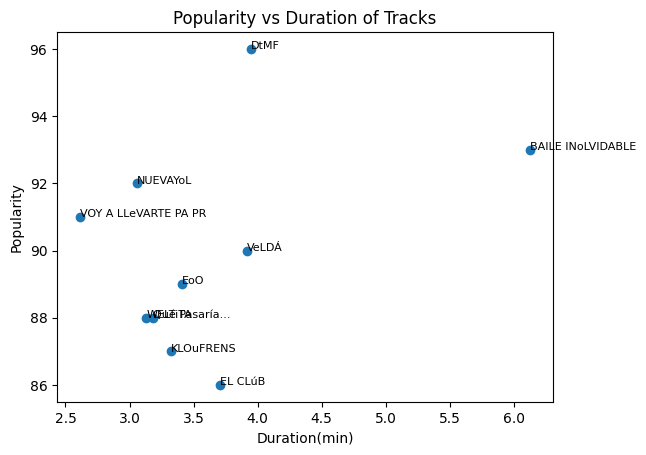

In [54]:
import matplotlib.pyplot as plt

info_bad_bunny = sp.artist_top_tracks( '4q3ewBCX7sLwd24euuV69X' , country = 'US' )

top_tracks = info_bad_bunny['tracks']
track_names = []
track_duration_ms = []
track_popularity = []

for track in top_tracks:
    track_names.append(track['name'])
    track_duration_ms.append(track['duration_ms'])
    track_popularity.append(track['popularity'])

# Convertir la duración de ms a minutos y redondearla a dos decimales. 
track_duration_min = [round(duration / 60000, 2) for duration in track_duration_ms]

data_frame = pd.DataFrame({
    'Names': track_names,
'Duration(min)': track_duration_min,
'Popularity': track_popularity
})
print(data_frame)


plt.scatter(data_frame['Duration(min)'], data_frame['Popularity'])
plt.xlabel('Duration(min)')
plt.ylabel('Popularity')
plt.title('Popularity vs Duration of Tracks')

# Mostrar los nombres de las canciones en los puntos del gráfico
for i, name in enumerate(data_frame['Names']):
    plt.text(data_frame['Duration(min)'][i], data_frame['Popularity'][i], name, fontsize=8)

plt.show()
